### Cosine Similarity

* Used to compute the similarity between two vectors
* Varies within a range of [-1, 1], where -1 is most dissimilar (pointing into \
the opposite direction), 1 is similar.

**How it works**

If two vectors point in the same direction, the angle between them will be 0. \
The $cos(0)=1$ i.e. tbese two vectors have maximum similarity. 

<ipython-input-133-594f4b9bb916>:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major')


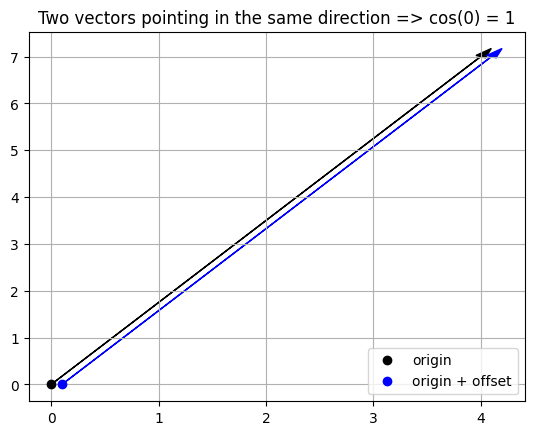

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc


# origin
O = np.array([0, 0])

# vector 
M = np.array([4, 7])

# for visualization
offset = 0.1

plt.arrow(O[0], O[1], M[0], M[1], head_width=0.1,head_length=0.2, color='black')
plt.arrow(O[0] + offset, O[1], M[0], M[1], head_width=0.1,head_length=0.2, color='blue')


plt.plot(0,0,'ok', label='origin') 
plt.plot(0+offset,0,'ob', label='origin + offset')
plt.grid(b=True, which='major') 
plt.legend(loc='lower right')
plt.title('Two vectors pointing in the same direction => cos(0) = 1')
plt.show()

The cosine similarity reduces as the vectors start to point in different \
directions.

<ipython-input-134-3e75be37deb8>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  arc = Arc(O, 2.5, 2.5, 14, 0, np.degrees(theta), color='red', lw=2)
<ipython-input-134-3e75be37deb8>:26: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major')


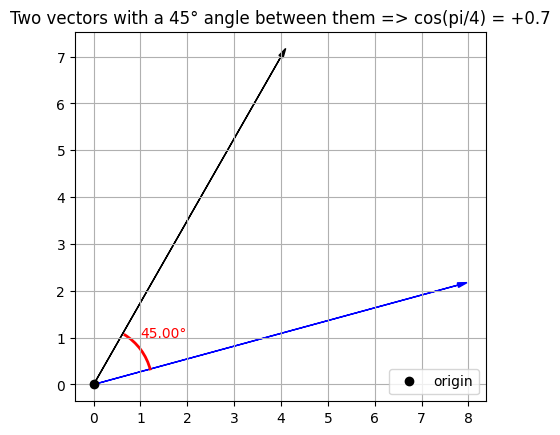

In [134]:
# get rotation of M of 45 degrees (theta)
# rotation matrix = (x', y') = ((cos(theta), sin(theta)), (-sin(theta), cos(theta))) * (x', y')

x2 = M[0] * np.cos(np.pi/4) + M[1] * np.sin(np.pi/4)
y2 = M[0] * -np.sin(np.pi/4) + M[1] * np.cos(np.pi/4)

M2 = np.array([x2, y2])

# calulate angle between the vectors
cos_theta = np.dot(M, M2) / (np.linalg.norm(M) * np.linalg.norm(M2))
theta = np.arccos(cos_theta)  # angle in radians


plt.arrow(O[0], O[1], M[0], M[1], head_width=0.1,head_length=0.2, color='black')
plt.arrow(O[0], O[1], M2[0], M2[1], head_width=0.1,head_length=0.2, color='blue')

# plot arc between vectors
arc = Arc(O, 2.5, 2.5, 14, 0, np.degrees(theta), color='red', lw=2)
plt.gca().add_patch(arc)

# show angle in degrees
plt.text(1.0, 1.0, f'{np.degrees(theta):.2f}°', color='red')

plt.gca().set_aspect('equal', adjustable='box')
plt.plot(0,0,'ok', label='origin') 
plt.grid(b=True, which='major') 
plt.legend(loc='lower right')
plt.title('Two vectors with a 45° angle between them => cos(pi/4) = +0.7')
plt.show()

The maximum dissimilarity occurs, when the two vectors point in opposite directions.

<ipython-input-152-2edd4011d8c6>:15: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  arc = Arc(O, 2.5, 2.5, 60, 0, np.degrees(theta), color='red', lw=2)
<ipython-input-152-2edd4011d8c6>:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major')


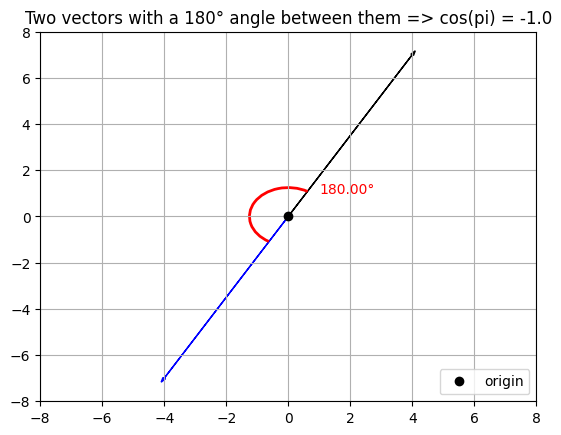

In [152]:
x3 = M[0] * np.cos(np.pi) + M[1] * np.sin(np.pi)
y3 = M[0] * -np.sin(np.pi) + M[1] * np.cos(np.pi)

M3 = np.array([x3, y3])

# calulate angle between the vectors
cos_theta = np.dot(M, M3) / (np.linalg.norm(M) * np.linalg.norm(M3))
cos_theta = np.clip(cos_theta, -1, 1)
theta = np.arccos(cos_theta)  # angle in radians

plt.arrow(0,0, M[0], M[1], head_width=0.1,head_length=0.2, color='black')
plt.arrow(0,0, M3[0], M3[1], head_width=0.1,head_length=0.2, color='blue')

# plot arc between vectors
arc = Arc(O, 2.5, 2.5, 60, 0, np.degrees(theta), color='red', lw=2)
plt.gca().add_patch(arc)

# show angle in degrees
plt.text(1.0, 1.0, f'{np.degrees(theta):.2f}°', color='red')

plt.plot(0,0,'ok', label='origin') 
plt.grid(b=True, which='major') 
plt.legend(loc='lower right')
plt.title('Two vectors with a 180° angle between them => cos(pi) = -1.0')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

The cosine similarity between two vectors can be obtained by taking the **dot product** \
of the elements of the vectors and then **deviding them by their magnitudes** for \
scaling purposes.

* $cos(\overrightarrow{A}, \overrightarrow{B}) = \large{\frac{\overrightarrow{A} \cdot \overrightarrow{B}}{|\overrightarrow{A}| |\overrightarrow{B}|}}$

This equation can be generalized as follows:

* $\text{similarity}(\overrightarrow{A}, \overrightarrow{B}) = \large{\frac{\overrightarrow{A} \cdot \overrightarrow{B}}{scaling}}$

To compute the similarity between matrix elements instead of vectors the second \
matrix has to be transposed to avoid conflicts in dimension during matrix multiplication.

* $\text{similarity}(\overrightarrow{A}, \overrightarrow{B}) = \large{\frac{\overrightarrow{A} \cdot \overrightarrow{B^T}}{scaling}}$

If you consider the **query and key matrices** used in the transformer architecture \
you will notice the similarity:

* $\text{similarity}(\overrightarrow{Q}, \overrightarrow{K}) = \large{\frac{\overrightarrow{Q} \cdot \overrightarrow{K^T}}{scaling}}$

* $\text{Attention} = \text{softmax}(\large{\frac{\overrightarrow{Q} \cdot \overrightarrow{K^T}}{\sqrt{d_k}}})$